## Lending_Club_Loan_Default_Prediction_Model_V2

## Introduction: 
> Lending club is a U.S based peer-to-peer lending platform. It connects individual borrowers to individual investor-lenders through online platforms. Investors are able to search and browse the loan listings on LendingClub website and select loans that they wante to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose, etc. Investors make money from the interest on these loans. LendingClub make money by charging borrowers an origination fee and investors a service fee. 

## Project objective:
> The aim of this project is to predict the chance that a loan will charge off, i.e., the customers who are not able to pay back the loan amount. Since customers who don't pay back their loan amount are a source of loss for the company, we want to build a machine learning model based on 12 years (2007-2019) of accepted loan applications data, which can predict if a particular applicant will or will not be able to payback the loan amount. The problem will be treated as a binary classification problem i.e. default or not default and a suitable predictive model is built.

> The objective of creating Model_V2 is to get a more accurate model with higher accuracy score as compared to Model_V1. We will try different sampling and ensembling techniques and incorporate different model improvement methods.

## 1. Loading & Reading Data

In [1]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv',sep=',', low_memory=False )

In [3]:
df.shape

(2260701, 151)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

## 2. Feature Reduction

> Based on the missing value analysis using missingno package in model_v1, and other techniques like identifying future data leakage variables, clubbing fico variables, and other skewed variables, we can directly drop those variables in this model to save our time.

In [6]:
df.drop(['member_id', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog',
                  'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq',
                  'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low',
                  'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
                  'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
                  'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med',
                  'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status',
                  'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
                  'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
                  'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount',
                  'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status',
                  'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term','url',
                  'addr_state','zip_code','funded_amnt','funded_amnt_inv','int_rate',
                  'sub_grade','emp_title','issue_d','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                  'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                  'policy_code','debt_settlement_flag','disbursement_method','last_credit_pull_d',
                  'earliest_cr_line','mths_since_recent_bc','num_bc_sats','num_sats', 'title', 'application_type',
                  'pymnt_plan'],axis=1, inplace=True)

In [7]:
df['fico_average'] = (df['fico_range_high'] + df['fico_range_low']) / 2
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
df = df.drop(drop_cols, axis=1)

In [8]:
df.shape

(2260701, 77)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 77 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   term                        object 
 3   installment                 float64
 4   grade                       object 
 5   emp_length                  object 
 6   home_ownership              object 
 7   annual_inc                  float64
 8   verification_status         object 
 9   loan_status                 object 
 10  purpose                     object 
 11  dti                         float64
 12  delinq_2yrs                 float64
 13  inq_last_6mths              float64
 14  mths_since_last_delinq      float64
 15  open_acc                    float64
 16  pub_rec                     float64
 17  revol_bal                   float64
 18  revol_util                  float64
 19  total_acc            

## 3. Data Slicing/Reducing No. of rows of data

> Here we are trying to reduce the number of rows of data or create some meaningful sample of data on which we can work on building our prediction model

### 3.1 Based on Target Variable 

> As per our business problem, we will club 'Fully paid' and 'Does not meet the credit policy Status:Fully Paid'. And 'Charged off' and 'Does not meet the credit policy Status:Charged Off' and 'Default'. Rest all the cases are 'current' and should be dropped from our analysis

In [10]:
# Clubbing required loan_status together and removing loan_status = 2

mapping_dict = {'loan_status':{'Fully Paid':0, 'Does not meet the credit policy. Status:Fully Paid':0,
                               'Charged Off': 1,'Does not meet the credit policy. Status:Charged Off':1,
                               'Default': 1,'Current':2,'Late (31-120 days)': 2,'Late (16-30 days)':2,'In Grace Period':2}}
df = df.replace(mapping_dict)
df.drop(df[df['loan_status'] == 2].index, inplace = True)

In [11]:
df.shape

(1348132, 77)

### 3.2 Based on % yearly Defaults

> Here we are Checking if the number of defaults is uniform over the years. If there is significant difference, those years of data with significantly high % defaullts can be removed, to remove possible bias. We will use last_payment_date to get the default year or year in which the default has been made

In [12]:
df['last_pymnt_yr'] = pd.DatetimeIndex(df['last_pymnt_d']).year

<AxesSubplot:xlabel='last_pymnt_yr', ylabel='default_percent'>

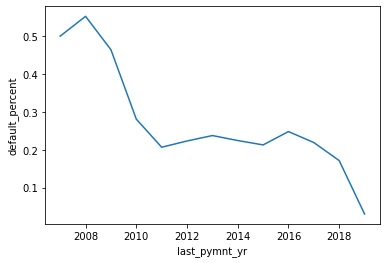

In [13]:
year_wise_loan_dfst=df.pivot_table(index='last_pymnt_yr', columns='loan_status', values='id', aggfunc='count').fillna(0)
year_wise_loan_dfst['default_percent']=year_wise_loan_dfst[1]/(year_wise_loan_dfst[0]+year_wise_loan_dfst[1])
year_wise_loan_dfst = pd.DataFrame(year_wise_loan_dfst.to_records())
sns.lineplot(data=year_wise_loan_dfst, x="last_pymnt_yr", y="default_percent", markers=True)

> In this version of model, we will consider full data from 2010 till 2016, where the default rate per year is in normal range.In version 1 of the prediction model we considered only the years of data from 2010 to 2014.

In [14]:
df1=df.copy()

In [15]:
#df = df.drop(df[df['last_pymnt_yr']] <= 2010 & df[df['last_pymnt_yr']] >= 2014)
df1.drop(df1[df1['last_pymnt_yr'] <2010.0].index, inplace=True)
df1.drop(df1[df1['last_pymnt_yr'] >2016.0].index, inplace=True)
df1.shape

(509496, 78)

### 3.3 Removing rows where the corresponding columns have less than 5% null values 

In [16]:
check = df1.isnull().sum() / len(df1)
cols_1 = check[check <= 0.05].index
cols_1

Index(['id', 'loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'last_pymnt_d', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'hardship_flag', 'fico_average', 'last_pymnt_yr'],
      dtype='object')

In [17]:
df1.dropna(subset=cols_1,inplace=True)

In [18]:
df1.shape

(482162, 78)

In [19]:
check = df1.isnull().sum() / len(df1) 
cols = check[check > 0.5].index
cols

Index(['mths_since_last_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [20]:
df1 = df1.drop(cols, axis=1)
df1.shape

(482162, 62)

In [21]:
check = df1.isnull().sum() / len(df1) 
cols = check[check > 0.0].index
cols

Index(['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
       'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit'],
      dtype='object')

## 4. Exploratory Data Analysis

In [22]:
df2=df1[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
       'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit']]

array([[<AxesSubplot:title={'center':'tot_coll_amt'}>,
        <AxesSubplot:title={'center':'tot_cur_bal'}>,
        <AxesSubplot:title={'center':'total_rev_hi_lim'}>,
        <AxesSubplot:title={'center':'acc_open_past_24mths'}>,
        <AxesSubplot:title={'center':'avg_cur_bal'}>,
        <AxesSubplot:title={'center':'bc_open_to_buy'}>],
       [<AxesSubplot:title={'center':'bc_util'}>,
        <AxesSubplot:title={'center':'mo_sin_old_il_acct'}>,
        <AxesSubplot:title={'center':'mo_sin_old_rev_tl_op'}>,
        <AxesSubplot:title={'center':'mo_sin_rcnt_rev_tl_op'}>,
        <AxesSubplot:title={'center':'mo_sin_rcnt_tl'}>,
        <AxesSubplot:title={'center':'mort_acc'}>],
       [<AxesSubplot:title={'center':'mths_since_recent_inq'}>,
        <AxesSubplot:title={'center':'num_accts_ever_120_pd'}>,
        <AxesSubplot:title={'center':'num_actv_bc_tl'}>,
        <AxesSubplot:title={'center':'num_actv_rev_tl'}>,
        <AxesSubplot:title={'center':'num_bc_tl'}>,
        <AxesSu

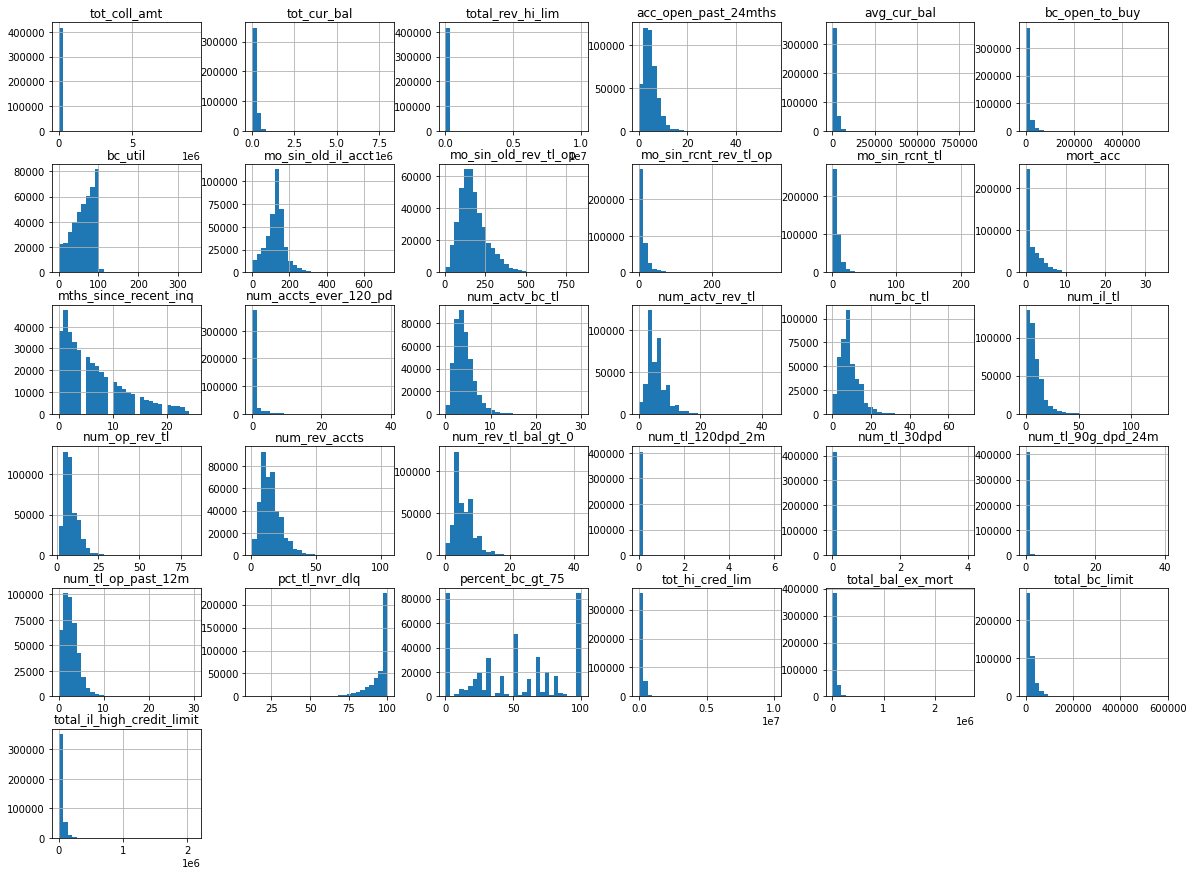

In [23]:
df2.hist(bins=30, figsize=(20, 15))

In [24]:
df2.describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.172260e+05,4.172260e+05,4.172260e+05,436000.000000,417226.000000,431925.000000,431687.000000,405327.000000,417226.000000,417226.000000,...,405273.000000,417226.000000,417226.000000,417226.000000,417107.000000,431793.000000,4.172260e+05,4.360000e+05,436000.000000,4.172260e+05
mean,2.089967e+02,1.412478e+05,3.105546e+04,4.686771,13613.939469,8996.906995,62.900901,125.273389,175.646678,12.535566,...,0.000780,0.003202,0.084312,2.198346,94.661578,48.989184,1.717512e+05,4.815626e+04,20419.428924,4.035030e+04
std,1.428427e+04,1.545357e+05,3.478663e+04,3.096188,16116.849158,14005.865689,27.615424,51.321131,86.642182,15.142035,...,0.030205,0.060074,0.477071,1.799201,8.088144,35.274388,1.728816e+05,4.485716e+04,20053.706427,4.098982e+04
min,0.000000e+00,0.000000e+00,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000,3.000000e+02,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,3.012700e+04,1.370000e+04,2.000000,3157.000000,1218.000000,42.800000,97.000000,115.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,92.000000,20.000000,4.891200e+04,2.104800e+04,7500.000000,1.434300e+04
50%,0.000000e+00,8.293700e+04,2.310000e+04,4.000000,7618.000000,3985.000000,67.300000,128.000000,160.000000,8.000000,...,0.000000,0.000000,0.000000,2.000000,100.000000,50.000000,1.123550e+05,3.671400e+04,14300.000000,3.060400e+04
75%,0.000000e+00,2.113765e+05,3.850000e+04,6.000000,19043.000000,10695.000000,86.900000,151.000000,221.000000,15.000000,...,0.000000,0.000000,0.000000,3.000000,100.000000,75.000000,2.491485e+05,6.067925e+04,26600.000000,5.439075e+04
max,9.152545e+06,8.000078e+06,9.999999e+06,56.000000,800008.000000,559912.000000,339.600000,724.000000,842.000000,372.000000,...,6.000000,4.000000,39.000000,30.000000,100.000000,100.000000,9.999999e+06,2.644442e+06,571500.000000,2.101913e+06


## 5. Missing Value treatment and Required imputation

In [25]:
df1["mort_acc"].fillna(df1["mort_acc"].median(), inplace = True)
df1["acc_open_past_24mths"].fillna(df1["acc_open_past_24mths"].mode()[0], inplace = True)
df1["bc_open_to_buy"].fillna((df1["bc_open_to_buy"].mean()), inplace = True)
df1["mo_sin_old_il_acct"].fillna((df1["mo_sin_old_il_acct"].mean()), inplace = True)
df1["mo_sin_old_rev_tl_op"].fillna((df1["mo_sin_old_rev_tl_op"].mean()), inplace = True)
df1["num_actv_bc_tl"].fillna((df1["num_actv_bc_tl"].mean()), inplace = True)
df1["num_bc_tl"].fillna((df1["num_bc_tl"].mean()), inplace = True)
df1["num_actv_rev_tl"].fillna((df1["num_actv_rev_tl"].mean()), inplace = True)
df1["bc_util"].fillna((df1["bc_util"].mean()), inplace = True)
df1['num_il_tl'].fillna((df1['num_il_tl'].median()), inplace = True)
df1['num_tl_op_past_12m'].fillna((df1['num_tl_op_past_12m'].median()), inplace = True)
df1['num_op_rev_tl'].fillna((df1['num_op_rev_tl'].mean()), inplace = True)
df1['num_rev_accts'].fillna((df1['num_rev_accts'].mean()), inplace = True)
df1['num_rev_tl_bal_gt_0'].fillna((df1['num_rev_tl_bal_gt_0'].mean()), inplace = True)
df1['tot_cur_bal'].fillna((df1['tot_cur_bal'].mean()), inplace = True)
df1['total_rev_hi_lim'].fillna((df1['total_rev_hi_lim'].mean()), inplace = True)
df1['avg_cur_bal'].fillna((df1['avg_cur_bal'].mean()), inplace = True)
df1['num_accts_ever_120_pd'].fillna((df1['num_accts_ever_120_pd'].mean()), inplace = True)

In [26]:
df1['total_bc_limit'].fillna((df1['total_bc_limit'].median()), inplace = True)
df1['num_rev_tl_bal_gt_0'].fillna((df1['num_rev_tl_bal_gt_0'].median()), inplace = True)
df1['pct_tl_nvr_dlq'].fillna((df1['pct_tl_nvr_dlq'].median()), inplace = True)
df1['percent_bc_gt_75'].fillna((df1['percent_bc_gt_75'].median()), inplace = True)

In [27]:
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=2)
#df1['percent_bc_gt_75'] = imputer.fit_transform(df1['percent_bc_gt_75'].values.reshape(-1, 1))

In [28]:
# Removing remaining highly skewed columns

df1.drop(['tot_coll_amt','total_rev_hi_lim','mo_sin_rcnt_rev_tl_op',
               'mo_sin_rcnt_tl','mths_since_recent_inq','num_tl_120dpd_2m',
               'num_tl_30dpd','num_tl_90g_dpd_24m','tot_hi_cred_lim', 'total_bal_ex_mort','total_bal_ex_mort',
               'total_il_high_credit_limit'], axis=1,inplace=True)

In [29]:
df1.shape

(482162, 51)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482162 entries, 1 to 2260673
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          482162 non-null  object 
 1   loan_amnt                   482162 non-null  float64
 2   term                        482162 non-null  object 
 3   installment                 482162 non-null  float64
 4   grade                       482162 non-null  object 
 5   emp_length                  482162 non-null  object 
 6   home_ownership              482162 non-null  object 
 7   annual_inc                  482162 non-null  float64
 8   verification_status         482162 non-null  object 
 9   loan_status                 482162 non-null  float64
 10  purpose                     482162 non-null  object 
 11  dti                         482162 non-null  float64
 12  delinq_2yrs                 482162 non-null  float64
 13  inq_last_6mth

In [31]:
df1['term'] = df1.term.apply(lambda x: x.split()[0])

In [32]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr
1,68355089,24700.0,36,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,0.0,...,5.0,2.0,97.4,7.7,0.0,0.0,79300.0,N,717.0,2016.0
4,68476807,10400.0,60,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,0.0,...,6.0,4.0,96.6,60.0,0.0,0.0,20300.0,N,697.0,2016.0


In [33]:
# Cleaning employee_length column, Removing 'years' using Reg_exp

df1["emp_length"] = df1["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df1["emp_length"] = df1["emp_length"].apply(lambda x:int(x))

In [34]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr
1,68355089,24700.0,36,820.28,C,10,MORTGAGE,65000.0,Not Verified,0.0,...,5.0,2.0,97.4,7.7,0.0,0.0,79300.0,N,717.0,2016.0
4,68476807,10400.0,60,289.91,F,3,MORTGAGE,104433.0,Source Verified,0.0,...,6.0,4.0,96.6,60.0,0.0,0.0,20300.0,N,697.0,2016.0


In [35]:
# Removing remaining date columns from the dataset. Date variables are not useful for using in model, so can be dropped

df1.drop(['last_pymnt_d'],axis=1,inplace=True)

In [36]:
df1.shape

(482162, 50)

> We have imputed and treated the null values using suitable imputation techniques. Now we need to stress on categorical variables. Categorical variables can prove to be of great significance for improving and affecting the model. We will start with perfroming neccessary encoding to convert categorical variable into numerical variable so they can be used in our predictive model.

## 6. Encoding of Categorical variables

In [37]:
# Ordinal variable feature enginnering 
# Data encoding
df1['grade'] = df1['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
df1["home_ownership"] = df1["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
df1["emp_length"] = df1["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df1["emp_length"] = df1["emp_length"].apply(lambda x:int(x))

mapping_dict = {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'n/a': 0
    }
}

#df = df.drop(['last_credit_pull_d','title','earliest_cr_line'], axis=1)
    
df1 = df1.replace(mapping_dict)
df1.head()

print("Current shape of dataset :",df1.shape)
df1.head(2)

Current shape of dataset : (482162, 50)


,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr
1,68355089,24700.0,36,820.28,5,10,6,65000.0,Not Verified,0.0,...,5.0,2.0,97.4,7.7,0.0,0.0,79300.0,N,717.0,2016.0
4,68476807,10400.0,60,289.91,2,3,6,104433.0,Source Verified,0.0,...,6.0,4.0,96.6,60.0,0.0,0.0,20300.0,N,697.0,2016.0


In [38]:
# Using dummy encoding for verification_status column
verification_dummies = pd.get_dummies(df1['verification_status'], drop_first=False)
df1 = pd.concat([df1.drop('verification_status', axis=1), verification_dummies], axis=1)

#Encoding term feature 
term_dummies = pd.get_dummies(df['term'], drop_first=False)
df = pd.concat([df.drop('term', axis=1), term_dummies], axis=1)

In [39]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified
1,68355089,24700.0,36,820.28,5,10,6,65000.0,0.0,small_business,...,7.7,0.0,0.0,79300.0,N,717.0,2016.0,1,0,0
4,68476807,10400.0,60,289.91,2,3,6,104433.0,0.0,major_purchase,...,60.0,0.0,0.0,20300.0,N,697.0,2016.0,0,1,0


In [40]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [41]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified
1,68355089,24700.0,36,820.28,5,10,6,65000.0,0.0,small_business,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,926.35,0.0,0.0,204396.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,4.0,0.0,5.0,5.0,17.0,6.0,20.0,27.0,5.0,2.0,97.4,7.7,0.0,0.0,79300.0,N,717.0,2016.0,1,0,0
4,68476807,10400.0,60,289.91,2,3,6,104433.0,0.0,major_purchase,25.37,1.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,10128.96,0.0,0.0,331730.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,6.0,0.0,4.0,6.0,9.0,10.0,7.0,19.0,6.0,4.0,96.6,60.0,0.0,0.0,20300.0,N,697.0,2016.0,0,1,0


In [42]:
# Grouping other purpose apart from debt_consolidation and then using it.
# This is being done to handle the different levels of categories in this column which individually have very low proportion.

df1['purpose'] = df1['purpose'].replace(['credit_card', 'other','home_improvement','small_business','major_purchase','medical','moving','house','vacation','car','renewable_energy','wedding','educational'], 'others')
df1.purpose.value_counts()

debt_consolidation    287455
others                194707
Name: purpose, dtype: int64

In [43]:
# Dummy encoding for purpose column

verification_dummies = pd.get_dummies(df1['purpose'], drop_first=False)
df1 = pd.concat([df1.drop('purpose', axis=1), verification_dummies], axis=1)

In [44]:
df1.head(2) 

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified,debt_consolidation,others
1,68355089,24700.0,36,820.28,5,10,6,65000.0,0.0,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,926.35,0.0,0.0,204396.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,4.0,0.0,5.0,5.0,17.0,6.0,20.0,27.0,5.0,2.0,97.4,7.7,0.0,0.0,79300.0,N,717.0,2016.0,1,0,0,0,1
4,68476807,10400.0,60,289.91,2,3,6,104433.0,0.0,25.37,1.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,10128.96,0.0,0.0,331730.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,6.0,0.0,4.0,6.0,9.0,10.0,7.0,19.0,6.0,4.0,96.6,60.0,0.0,0.0,20300.0,N,697.0,2016.0,0,1,0,0,1


In [45]:
# Dummy encoding for initial_list_status column

verification_dummies = pd.get_dummies(df1['initial_list_status'], drop_first=False)
df1 = pd.concat([df1.drop('initial_list_status', axis=1), verification_dummies], axis=1)

In [46]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w
1,68355089,24700.0,36,820.28,5,10,6,65000.0,0.0,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,926.35,0.0,0.0,204396.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,4.0,0.0,5.0,5.0,17.0,6.0,20.0,27.0,5.0,2.0,97.4,7.7,0.0,0.0,79300.0,N,717.0,2016.0,1,0,0,0,1,0,1
4,68476807,10400.0,60,289.91,2,3,6,104433.0,0.0,25.37,1.0,3.0,12.0,0.0,21929.0,64.5,35.0,10128.96,0.0,0.0,331730.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,6.0,0.0,4.0,6.0,9.0,10.0,7.0,19.0,6.0,4.0,96.6,60.0,0.0,0.0,20300.0,N,697.0,2016.0,0,1,0,0,1,0,1


In [47]:
df1.shape

(482162, 54)

In [48]:
# Taking taget variable 'loan_status' to the end of the dataframe

# df1.insert(48, 'loan_status', df1.pop('loan_status'))

In [49]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,hardship_flag,fico_average,last_pymnt_yr,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w
1,68355089,24700.0,36,820.28,5,10,6,65000.0,0.0,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,926.35,0.0,0.0,204396.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,4.0,0.0,5.0,5.0,17.0,6.0,20.0,27.0,5.0,2.0,97.4,7.7,0.0,0.0,79300.0,N,717.0,2016.0,1,0,0,0,1,0,1
4,68476807,10400.0,60,289.91,2,3,6,104433.0,0.0,25.37,1.0,3.0,12.0,0.0,21929.0,64.5,35.0,10128.96,0.0,0.0,331730.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,6.0,0.0,4.0,6.0,9.0,10.0,7.0,19.0,6.0,4.0,96.6,60.0,0.0,0.0,20300.0,N,697.0,2016.0,0,1,0,0,1,0,1


In [50]:
# Removing few remaining unwanted columns

df1.drop(['mo_sin_old_rev_tl_op','mo_sin_old_il_acct','num_tl_op_past_12m',
          'num_bc_tl','num_actv_rev_tl','hardship_flag','num_il_tl','num_op_rev_tl','num_rev_accts',
          'num_rev_tl_bal_gt_0','pct_tl_nvr_dlq','last_pymnt_yr'], axis=1,inplace=True)

In [51]:
df1.shape

(482162, 42)

In [52]:
df1.head(2)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_average,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w
1,68355089,24700.0,36,820.28,5,10,6,65000.0,0.0,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,926.35,0.0,0.0,204396.0,4.0,9733.0,57830.0,27.1,0.0,0.0,4.0,0.0,5.0,7.7,0.0,0.0,79300.0,717.0,1,0,0,0,1,0,1
4,68476807,10400.0,60,289.91,2,3,6,104433.0,0.0,25.37,1.0,3.0,12.0,0.0,21929.0,64.5,35.0,10128.96,0.0,0.0,331730.0,10.0,27644.0,4567.0,77.5,0.0,0.0,6.0,0.0,4.0,60.0,0.0,0.0,20300.0,697.0,0,1,0,0,1,0,1


In [53]:
# Taking taget variable 'loan_status' to the end of the dataframe

df1.insert(41, 'loan_status', df1.pop('loan_status'))

In [54]:
df1.reset_index(drop=True)

,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_average,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w,loan_status
0,68355089,24700.0,36,820.28,5,10,6,65000.0,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,926.35,0.0,0.0,204396.0,4.0,9733.0,57830.0,27.1,0.0,0.0,4.0,0.0,5.0,7.7,0.0,0.0,79300.0,717.0,1,0,0,0,1,0,1,0.0
1,68476807,10400.0,60,289.91,2,3,6,104433.0,25.37,1.0,3.0,12.0,0.0,21929.0,64.5,35.0,10128.96,0.0,0.0,331730.0,10.0,27644.0,4567.0,77.5,0.0,0.0,6.0,0.0,4.0,60.0,0.0,0.0,20300.0,697.0,0,1,0,0,1,0,1,0.0
2,68476668,20000.0,36,637.58,6,10,6,180000.0,14.67,0.0,0.0,12.0,0.0,87329.0,84.5,27.0,15681.05,0.0,0.0,360358.0,6.0,30030.0,0.0,102.9,0.0,0.0,4.0,0.0,4.0,100.0,0.0,0.0,31500.0,682.0,1,0,0,1,0,1,0,0.0
3,68466916,25000.0,36,777.55,7,10,6,109000.0,26.02,0.0,1.0,9.0,0.0,20862.0,54.3,19.0,20807.39,0.0,0.0,305781.0,2.0,33976.0,17538.0,54.3,0.0,0.0,3.0,0.0,3.0,20.0,0.0,0.0,38400.0,747.0,1,0,0,1,0,0,1,0.0
4,68577849,18000.0,60,400.31,5,10,6,112000.0,8.68,0.0,0.0,17.0,0.0,10711.0,15.5,27.0,18004.90,0.0,0.0,205067.0,5.0,17089.0,60336.0,16.7,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,69800.0,802.0,1,0,0,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482157,90130176,40000.0,60,1059.54,4,10,5,160000.0,16.13,0.0,0.0,9.0,0.0,17817.0,46.4,32.0,6995.01,0.0,0.0,136206.0,4.0,15134.0,20583.0,46.4,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,38400.0,722.0,0,0,1,1,0,1,0,0.0
482158,90397786,13000.0,36,444.25,5,10,6,122000.0,13.77,0.0,0.0,18.0,1.0,12887.0,33.2,28.0,444.25,0.0,0.0,29723.0,8.0,1982.0,15079.0,35.3,0.0,0.0,0.0,0.0,2.0,66.7,1.0,0.0,23300.0,667.0,0,1,0,1,0,1,0,1.0
482159,90106110,15000.0,60,345.08,5,3,5,90000.0,21.47,0.0,1.0,22.0,0.0,36471.0,56.5,47.0,345.08,0.0,0.0,57746.0,4.0,3397.0,9243.0,78.3,0.0,0.0,6.0,1.0,5.0,57.1,0.0,0.0,42500.0,697.0,0,1,0,1,0,1,0,1.0
482160,89818677,24000.0,60,552.12,5,10,6,145000.0,25.85,0.0,0.0,22.0,0.0,60328.0,59.6,27.0,24030.22,0.0,0.0,112899.0,1.0,5132.0,14121.0,63.6,0.0,0.0,2.0,0.0,3.0,22.2,0.0,0.0,38800.0,722.0,1,0,0,0,1,1,0,0.0


> After all missing value treatment, necessary impuatation and encoding of categorical variable, our data is now ready to used for building the prediction model. We will start with analysing the loan_status column, try to use equal sample of defaults and non-defaults to remove any bias in the model, the move on to training and testing the model. We will use logistic regression model to predict, because the nature of problem is binary classification in nature.

## 7. Preparing the Model

In [55]:
# Checking defaluts vs non-defaults

df1['loan_status'] = df1['loan_status']
df1['loan_status'].value_counts()

0.0    371746
1.0    110416
Name: loan_status, dtype: int64

In [56]:
# Equal sampling of defaults and non-defaults to be added in the model dataset.

loanstatus_0 = df1[df1["loan_status"]==0]
loanstatus_1 = df1[df1["loan_status"]==1]
#subset_of_loanstatus_0 = loanstatus_0.sample(n=)
subset_of_loanstatus_0 = loanstatus_0.sample(n=50000)
#subset_of_loanstatus_1 = loanstatus_1.sample(n=)
subset_of_loanstatus_1 = loanstatus_1.sample(n=50000)
df1 = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
df1 = df1.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",df1.shape)

df1.head(2)

Current shape of dataset : (100000, 42)


,id,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_average,Not Verified,Source Verified,Verified,debt_consolidation,others,f,w,loan_status
0,2645909,25000.0,36,870.44,5,5,6,60000.0,28.50,0.0,0.0,14.0,0.0,11990.0,43.1,32.0,435.22,0.0,0.0,180879.000000,8.0,12920.000000,487.000000,87.800000,0.0,0.0,2.0,2.00000,2.000000,100.0,0.0,0.0,4000.0,697.0,0,0,1,1,0,0,1,1.0
1,544081,14000.0,60,307.83,6,5,5,77000.0,12.36,0.0,2.0,11.0,0.0,9071.0,20.0,38.0,307.83,0.0,0.0,141247.833136,3.0,13613.939469,8996.906995,62.900901,0.0,0.0,1.0,0.46424,3.641132,50.0,0.0,0.0,14300.0,757.0,0,0,1,0,1,1,0,1.0


In [57]:
# Splitting the dataset into train and test (80%/20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,:-1], df1.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(df1, test_size = 0.2, random_state=42) #just for bootstrapping

X_train.shape

(80000, 41)

In [58]:
# Standardize features:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

> Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. If a feature has a variance that is orders of magnitude larger than others, It might dominate the objective function and make the estimator unable to learn from other features correctly as expected. Standard scaler standardize features by removing the mean and scaling to unit variance. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

## 9. Using logistic Regression to Predict

In [60]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

## 10. Evaluating the Prediction Model

In [61]:
# Creating confusion matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8677, 1487],
       [ 541, 9295]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

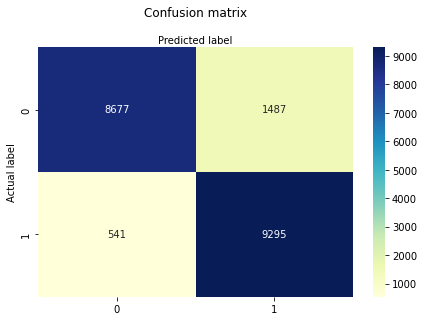

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

>  A confusion matrix is a nxn matrix used to evaluate the performance of a classification model. n is the number of target classes, for e.g. in a binary classification problem, we will have 2x2 matrix. Target variable has two values: Positive or Negative. Columns in the matrix represent actual values of the target variable. Rows represent the predicted values of the target variable. True Positive (TP): The actual value was positive and model predicted a positive value. True Negative (TN): The actual value was negative and model predicted a negative value. False Positive (FP): The actual value was negative but model predicted a positive value, - Type1 error. False Negative (FN): The actual value was positive but model predicted a negative value - Type2 error. Fitting the classifier on each datapoint in the dataset and classifying into each category. Confusion Matrix Accuracy = (TP+TN)/(TP+TN+FP+FN). Precision: How many of the correctly predicted cases actually turned out to be true.  TP/(TP+FP). Recall: How many of the actual cases were we able to predict correctly with our model. TP/(TP+FN). F1-Score: Harmonic mean of Precision and Recall, and gives a combined idea about these two metrics.  2/(1/Recall + 1/Precision)

In [63]:
# Creating classification report

from sklearn.metrics import classification_report
target_names = ['Not Default ', ' Default ']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not Default        0.94      0.85      0.90     10164
    Default        0.86      0.94      0.90      9836

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



> We can observe that the overall accuracy of the model has increased from 0.6 in version_1 to 0.9 here, with precision and recall both almost equal to 0.9. f1-score which takes into consideration both precision and recall (Harmonic mean) is also equal to 0.9. Here f-1 score is also an important evaluation score considering both the precision and recall in this business context. We can't ignore Precision neither Recall because either of the cases can lead to significantly high losses for the company. 

> Main reason behind the better accuracy score for model version_2 can be linked with larger sample of data being used this time, i.e. data from 2010-2016. Rest all process and selected features are almost the same. We will further use some other techniques to check if there is a scope to further improve the accuracy of this model.

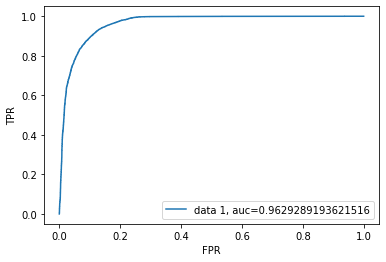

In [64]:
# Creating ROC-AUC curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

> The Receiver Operator Characteristic (ROC) curve is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. TPR (True positive rate) is basically the Recall, FPR (False Positive Rate) = 1-Specificity. Specificity or True Negative Rate = TN/(TN+FP) 
> The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

> The plot shows a good classifier, with the ROC curve closer to the axes and the “elbow” close to the coordinate (0,1).

### Let's try different threshold values

> A machine learning classification model can be used to predict the actual class of the data point directly or predict its probability of belonging to different classes. The latter gives us more control over the result. We can determine our own threshold to interpret the result of the classifier. Setting different thresholds for classifying positive class for data points will inadvertently change the Sensitivity and Specificity of the model. And one of these thresholds will probably give a better result than the others, depending on whether we are aiming to lower the number of False Negatives or False Positives.

In [65]:
THRESHOLD = 0.7
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

#accuracy_score(y_test, preds), recall_score(y_test, preds),precision_score(y_test, preds), roc_auc_score(y_test, preds)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     10164
         1.0       0.93      0.82      0.87      9836

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



In [67]:
THRESHOLD = 0.8
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

#accuracy_score(y_test, preds), recall_score(y_test, preds),precision_score(y_test, preds), roc_auc_score(y_test, preds)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86     10164
         1.0       0.95      0.72      0.82      9836

    accuracy                           0.85     20000
   macro avg       0.87      0.84      0.84     20000
weighted avg       0.86      0.85      0.84     20000



> Also, our default prediciton threshold is 0.5. Using threshold values of 0.7 and 0.8 is leading to decrease in overall accuracy and f-1 score.

In [69]:
copy_df_k=df1.copy()

## 10. Improving the model

### 10.1 K-Fold cross validation

In [70]:
# Applying K-fold cross validation to improve the model

from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = copy_df_k.iloc[:,:-1]
y = copy_df_k.iloc[:,-1]

#Implementing cross validation

k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    print(X_train.shape,y_train.shape)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

(90000, 41) (90000,)
(90000, 41) (90000,)
(90000, 41) (90000,)
(90000, 41) (90000,)
(90000, 41) (90000,)
(90000, 41) (90000,)
(90000, 41) (90000,)
(90000, 41) (90000,)
(90000, 41) (90000,)
(90000, 41) (90000,)
accuracy of each fold - [0.8806, 0.8856, 0.8839, 0.8861, 0.8847, 0.8891, 0.8862, 0.8857, 0.8834, 0.89]
Avg accuracy : 0.8855299999999999


> K-fold invoves a typical resampling technique. In each set (fold) training and the test would be performed precisely once during this entire process. It helps us to build the model as a generalized one. Based on the K value, the data set would be divided, and train/testing will be conducted in a sequence way equal to K time. During each run, one fold is considered for testing and the rest will be for training. We understand how the data is spread in a way of consistency and will make a conclusion whether to go for the production with this model (or) NOT. 

> Avg accuracy by using K-fold is 0.88, almost the same to 0.9 for the entire model. But then k-fold cross validation is about estimating the accuracy, not improving the accuracy. And it shows that our data sample is reliable without bias and variance. 

### 10.2 Using Principal Component Analysis for Feature-reselection 

In [79]:
# Using PCA

from sklearn.decomposition import PCA 
pca = PCA(n_components=39, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [9.99960763e-01 3.07357759e-05 6.97263421e-06 8.27550511e-07
 4.20674976e-07 1.03547658e-07 8.29712049e-08 5.18526322e-08
 4.11181001e-08 8.01010567e-10 1.00010456e-11 2.05692298e-12
 9.08030563e-13 3.68356121e-13 1.88931726e-13 1.48086270e-13
 8.30642468e-14 4.88074348e-14 1.95223955e-14 1.70536429e-14
 9.14550414e-15 3.83458779e-15 3.45528497e-15 1.88581811e-15
 1.76379706e-15 1.07090998e-15 9.57377941e-16 7.21724663e-16
 6.26521790e-16 5.52500272e-16 5.40912956e-16 5.13058018e-16
 4.02422756e-16 1.61954074e-16 2.29083846e-17 1.69689340e-17
 1.57846548e-17 7.78533296e-18 9.98362894e-33]


> Variance states how the value of particular feature varies throughout the data. More the variance, more is the importance of that feature. As it contains more ‘information’. Principal components are new set of transformed feature set which can explain the variance in a much better manner.

> Explained Variance Ratio tells how much variance in the data is explained by a particular principal component. Principal components are ranked in order of their explained variance ratio.

> We tried to re-run the model using the principal features from the above output but the model accuracy remains almost same. Hence we try another feature selection technique known as Feature recursive elimination.

### 10.3 Using Recursive Feature Elimination Technique

In [73]:
# #Recursive feature elimination technique to understand the importance of features

from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
from numpy import array

estimator = AdaBoostRegressor(random_state=0, n_estimators=100)
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(X_train,y_train)
filter = selector.support_
ranking = selector.ranking_

print("Mask data: ", filter)
print("Ranking: ", ranking)

Mask data:  [ True  True  True  True  True  True  True  True  True  True False False
 False False False False  True False False False  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False]
Ranking:  [ 1  1  1  1  1  1  1  1  1  1  3  5  7  9 11 13  1 17 19 21  1  1  1  1
  1  1  1  1  1  2  4  6  8 10 12 14 15 16 18 20 22]


> Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

> We tried running our model again with the recursive feature selctions but the accuracy remains unaffected hence we stop at this point. The model seems to have learned as much as it can based on our initial selected list of features. 

## Conclusion:

> Using two more years of data, significantly improved the accuracy of the model. Proper missing value analysis and EDA helps in feature selection and required imputations. Categorical variables are important as they can add a lot to improving the accuracy of the model if encoded and used. To remove bias, sample for training and testing should include equal sample of defaults and non-defaults. Different evaluation methods like Confusion Matrix, Classification report and ROC-AUC curve can be used to evaluate a classification model. Different methods like k-fold, RFE, PCA, etc can be used to re-sample and re-select features for generating more accurate models.